<a href="https://colab.research.google.com/github/Jobby-John/Week-2-IP/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dataframes
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

In [ ]:
#loading our csv file
financial_df = pd.read_csv("Financial Dataset - 1.csv")
financial_df

In [ ]:
#determining the shape of the dataset
financial_df.shape

In [ ]:
#previewing the top of our data set
financial_df.head(5)

In [ ]:
#checking if each column has an appropriate data set
financial_df.dtypes

Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


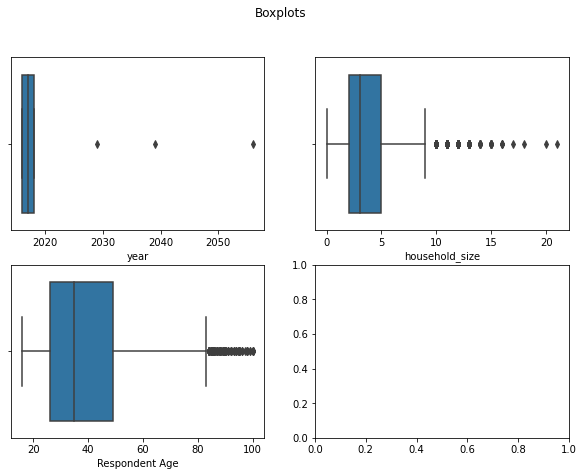

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(financial_df['year'], ax=ax1)
sns.boxplot(financial_df['household_size'], ax=ax2)
sns.boxplot(financial_df['Respondent Age'], ax=ax3)

plt.show()

Checking existence of any anomalies

In [ ]:
q1_household_size = financial_df['household_size'].quantile(.25)
q3_household_size= financial_df['household_size'].quantile(.75)

iqr_household_size = q3_household_size - q1_household_size

q1_Respondent Age = financial_df['Respondent Age'].quantile(.25)
q3_Respondent Age = financial_df['Respondent Age'].quantile(.75)

iqr_Respondent Age = q3_Respondent Age - q1_Respondent Age

print(iqr_household_size, iqr_Respondent Age)

Checking existence of any missing datas and dealing with them

In [8]:
financial_df.isnull()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
financial_df.dropna(inplace=True)


In [ ]:
#dropping unncessary columns
financial_df.year.unique()

In [ ]:
financial_df.info()



Explaratory Analysis




Plotting the univariate plots

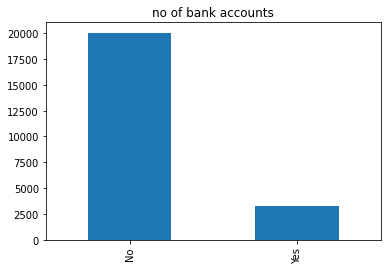

In [13]:
financial_df['Has a Bank account'].value_counts().plot.bar(title = 'no of bank accounts')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


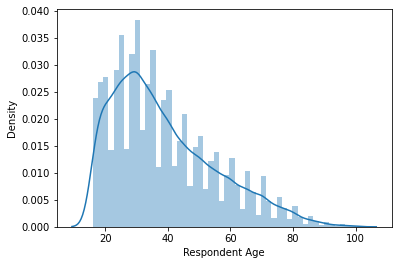

In [14]:
#checking distribution age for respodents
sns.distplot(financial_df['Respondent Age'], hist=True)

# the respondents where from age 20 -100

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


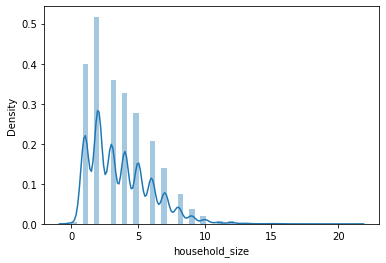

In [15]:
sns.distplot(financial_df['household_size'], hist=True)

In [16]:
# determining the numerical analysis in our data set

df2 = financial_df.drop('year', axis = 1)
df2.describe()

,household_size,Respondent Age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


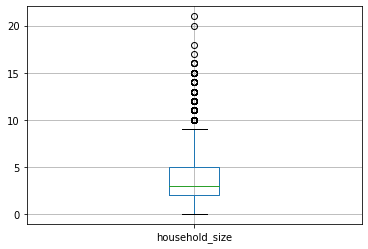

In [17]:
# plotting a box plot
financial_df.boxplot(["household_size"])

# from our data set we can see that the average number of household members was 5 and below and a few households had 10 and above household members.

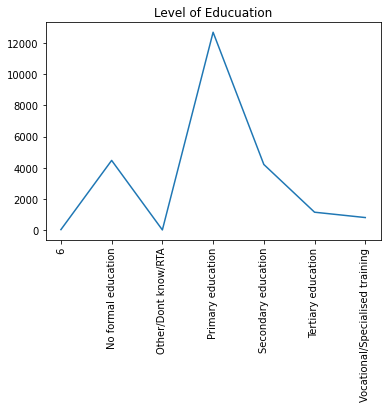

In [18]:
#plotting a line chart on level of education
financial_df['Level of Educuation'].value_counts().sort_index().plot.line(title='Level of Educuation',rot=90)


# most people who participated in the study had a primary school level of education .

BIVARIATE ANALYSIS

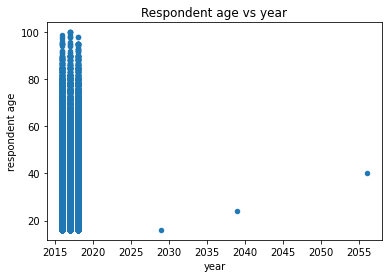

In [19]:
# Using Pandas: Plotting our scatterplot to compare the variables
financial_df.plot(x = 'year', y = 'Respondent Age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
#plt.scatter(trees_df["diameter_at_breast_height_cm"] , trees_df["clear_fell_ksh/_m_cubed"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
#sns.regplot(x = trees_df["diameter_at_breast_height_cm"], y = trees_df["clear_fell_ksh/_m_cubed"], fit_reg=False)

# Giving our scatterplot a title
plt.title('Respondent age vs year')

# Labelling our x axis
plt.xlabel('year')


# Labelling our y axis
plt.ylabel('respondent age')

# We then display our scatterplot as shown below
plt.show()

In [20]:
# showing the pearson correlation between the numerical variables
financial_df["year"].corr(financial_df["Respondent Age"])

# from the calculated pearson coefficient it shows that the respondent Age are negatively weakly correlated.

-0.0190618449776902

In [21]:
financial_df["year"].corr(financial_df["household_size"])
# the two variables show a very weak negative correlation

-0.048901996192637645

In [22]:
financial_df["household_size"].corr(financial_df["Respondent Age"])
# the coeffeicient shows a weak negative correlation between the household size and respondent age.

-0.11970919507762415

In [23]:
financial_df["Respondent Age"].corr(financial_df["household_size"])

-0.11970919507762415

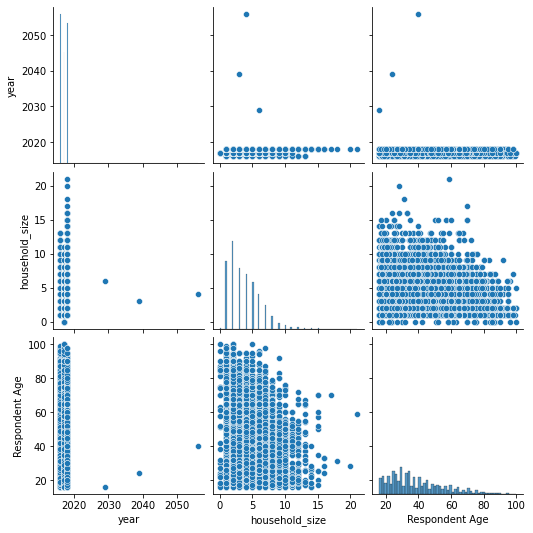

In [24]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financial_df)
plt.show()

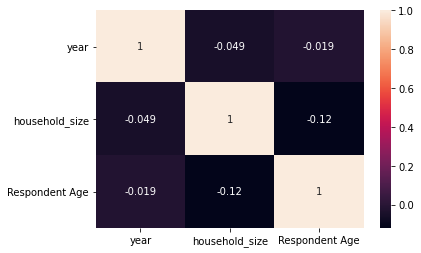

In [25]:
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

gender_of_respondent  Has a Bank account
Female                No                    0.892497
                      Yes                   0.107503
Male                  No                    0.810255
                      Yes                   0.189745
Name: Has a Bank account, dtype: float64


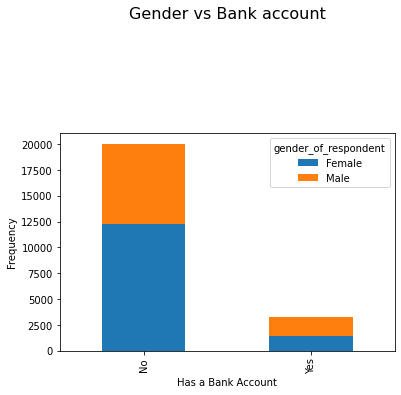

In [26]:
financial_df.groupby('gender_of_respondent')['Has a Bank account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')
labels = financial_df.groupby('gender_of_respondent')['Has a Bank account'].value_counts(normalize=True)
print(labels)
plt.title("Gender vs Bank account", fontsize=16, y=1.5)
plt.xlabel("Has a Bank Account")
plt.ylabel("Frequency")
plt.show()


Cell Phone Access  Has a Bank account
No                 No                    0.982693
                   Yes                   0.017307
Yes                No                    0.815796
                   Yes                   0.184204
Name: Has a Bank account, dtype: float64


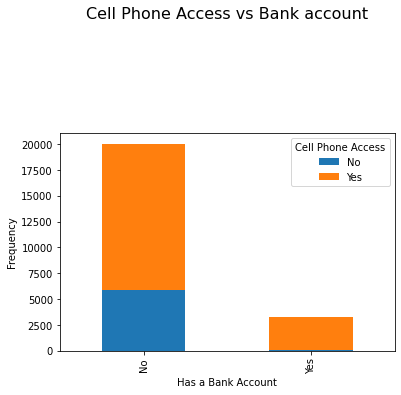

In [27]:
# showing how cell phone access was related to owning a bank account
financial_df.groupby('Cell Phone Access')['Has a Bank account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')
labels = financial_df.groupby('Cell Phone Access')['Has a Bank account'].value_counts(normalize=True)
print(labels)
plt.title("Cell Phone Access vs Bank account", fontsize=16, y=1.5)
plt.xlabel("Has a Bank Account")
plt.ylabel("Frequency")
plt.show()

Type of Location  Has a Bank account
Rural             No                    0.883413
                  Yes                   0.116587
Urban             No                    0.820024
                  Yes                   0.179976
Name: Has a Bank account, dtype: float64


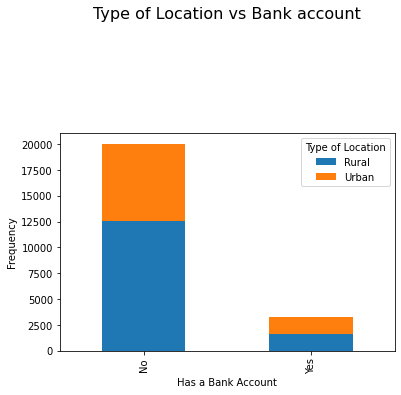

In [28]:
# relation between type of location and cell phone access
financial_df.groupby('Type of Location')['Has a Bank account'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')
labels = financial_df.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True)
print(labels)
plt.title("Type of Location vs Bank account", fontsize=16, y=1.5)
plt.xlabel("Has a Bank Account")
plt.ylabel("Frequency")
plt.show()


# the number of people without bank accounts mostly live in rural areas. Urbanization has an effect on owning a bank account.

Type of Job                   Has a Bank account
Dont Know/Refuse to answer    No                    0.888000
                              Yes                   0.112000
Farming and Fishing           No                    0.883069
                              Yes                   0.116931
Formally employed Government  Yes                   0.774611
                              No                    0.225389
Formally employed Private     Yes                   0.541031
                              No                    0.458969
Government Dependent          No                    0.797571
                              Yes                   0.202429
Informally employed           No                    0.920721
                              Yes                   0.079279
No Income                     No                    0.978964
                              Yes                   0.021036
Other Income                  No                    0.818013
                              Yes   

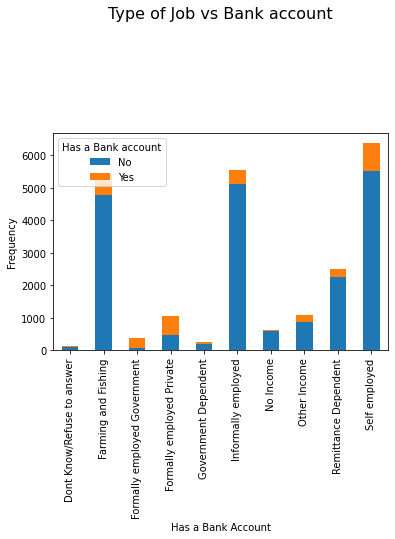

In [29]:
# relation between the type of job and owning a bank account
financial_df.groupby('Type of Job')['Has a Bank account'].value_counts().unstack(level=-1).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')
labels = financial_df.groupby('Type of Job')['Has a Bank account'].value_counts(normalize=True)
print(labels)
plt.title("Type of Job vs Bank account", fontsize=16, y=1.5)
plt.xlabel("Has a Bank Account")
plt.ylabel("Frequency")
plt.show()

country   Has a Bank account
Kenya     No                    0.749340
          Yes                   0.250660
Rwanda    No                    0.885191
          Yes                   0.114809
Tanzania  No                    0.907846
          Yes                   0.092154
Uganda    No                    0.913604
          Yes                   0.086396
Name: Has a Bank account, dtype: float64


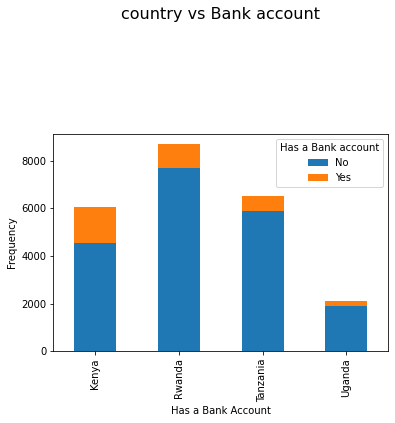

In [30]:
# bank account ownership per countries
financial_df.groupby('country')['Has a Bank account'].value_counts().unstack(level=-1).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')
labels = financial_df.groupby('country')['Has a Bank account'].value_counts(normalize=True)
print(labels)
plt.title("country vs Bank account", fontsize=16, y=1.5)
plt.xlabel("Has a Bank Account")
plt.ylabel("Frequency")
plt.show()


# kenya was leading with the number of people who had bank accounts

PCA ANALYSIS

In [32]:
# encoding

financial_df['Has a Bank account'] = financial_df['Has a Bank account'].replace(to_replace=['Yes','No'], value=[0,1])
financial_df['gender_of_respondent'] = financial_df['gender_of_respondent'].replace(to_replace=['Female','Male'], value=[0,1])
financial_df['Cell Phone Access'] = financial_df['Cell Phone Access'].replace(to_replace=['Yes','No'], value=[0,1])
financial_df['Type of Location'] = financial_df['Type of Location'].replace(to_replace=['Rural','Urban'], value=[0,1])

In [ ]:
financial_df.isnull().sum()

In [ ]:
financial_df.head()

In [34]:
#exporting the cleaned dataset
financial_df.to_csv('cleanfinancial_df.csv')

In [35]:
# Preprocessing
# 
X = financial_df.iloc[: , [3, 4, 5, 6, 7, 8]]
y = financial_df.iloc[ : , [ 0 ]]

In [36]:
#Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
#Normalization
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
# Explained Variance Ratio
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.22572846, 0.21380158, 0.17341413, 0.15055471, 0.12763032,
       0.10887081])

In [40]:


#Using 1 Principal Component
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [41]:
# Training and Making Predictions
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [42]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# our data has a 53.19% accuracy level

[[  46  866  301    0]
 [  22 1622  121    0]
 [   9  379  906    0]
 [   8  321   68    0]]
Accuracy 0.551295780681088


In [ ]:
#Results with 2 Principal Components
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[  46  866  301    0]
 [  22 1622  121    0]
 [   9  379  906    0]
 [   8  321   68    0]]
Accuracy 0.551295780681088


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
#Results with Full Feature Set
# Let's try to find the results with full feature set. 
# To do so, we simply remove the PCA part from the script that we wrote above

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[  89  741  383    0]
 [  81 1475  209    0]
 [   4  144 1146    0]
 [  13  291   93    0]]
Accuracy 0.580424073677447


In [48]:
#loading our csv file
df = pd.read_csv('cleanfinancial_df.csv',  index_col= 0)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,0,0,0,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,1,0,1,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,0,1,0,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,1,0,0,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,1,1,1,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [49]:
# Once dataset is loaded into a pandas data frame object, the first step is to divide dataset
X = df.iloc[: , [3, 4, 5, 6, 7, 8]].values
y = df.iloc[ : , [ 0 ]].values

In [50]:
#The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
#  Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# Training and Making Predictions

# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [54]:
#Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 424  571  218    0]
 [ 419 1303   43    0]
 [ 367   74  853    0]
 [ 128  228   41    0]]
Accuracy0.5525808524309274


IMPLEMENTING THE SOLUTION


from my analysis kenya was leading in the various sections that are
1. people with bank accounts
2. the people who are formally employed by the government
3. People who are formally employed by private sector and those who are self employed were leading on bank account ownership. 
Thus the other countries should put more efforts in sensitizing the other groups on bank account ownership.

    Follow up questions

a) did we have the right data set

Yes

b). Do we need other data to answer our question?

Yes

c). Did we have the right question?

Yes
